In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Study strain-rate dependency


## Temperatures other than RT

In [ ]:
# Load the Excel file
excel_path = '../data/Exp_FC_StrRtDpn_TmpDpn.xlsx'
excel_data = pd.ExcelFile(excel_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Exclude sheets containing "298" in their names
sheets_to_plot = [sheet for sheet in sheet_names if "298" not in sheet]

# Plot for each valid sheet individually
for sheet in sheets_to_plot:
    data = pd.read_excel(excel_path, sheet_name=sheet)
    
    # Grouping by strain rate (e.g., "StrRt0.0001")
    strain_rates = sorted(set(col.split('_')[1] for col in data.columns if '_E' in col))
    
    # Initialize the plot for the sheet
    plt.figure(figsize=(7, 4))
    
    min_x, min_y = float('inf'), float('inf')
    
    for strain_rate in strain_rates:
        e_cols = [col for col in data.columns if f"_{strain_rate}_" in col and col.endswith('_E')]
        s_cols = [col for col in data.columns if f"_{strain_rate}_" in col and col.endswith('_S')]
        for e_col, s_col in zip(e_cols, s_cols):
            plt.plot(data[e_col], data[s_col], label=f"Strain Rate {strain_rate}", linewidth=3)  # Adjust thickness here
            min_x = min(min_x, data[e_col].min())
            min_y = min(min_y, data[s_col].min())
    
    # Customize the plot
    plt.xlabel('Strain', fontsize=14)
    plt.ylabel('Stress', fontsize=14)
    plt.title(f'Experimental Stress vs. Strain for {sheet}', fontsize=14, fontweight='bold')
    plt.xlim(left=min_x)
    plt.ylim(bottom=min_y)
    plt.legend(loc='lower right', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()


## RT

In [ ]:
sheet_name = 'Tmp298.15K_RD-DD-TD'

# Read the data from the specified sheet
data = pd.read_excel(excel_path, sheet_name=sheet_name)

# Filter columns that contain "RD"
rd_columns = [col for col in data.columns if "RD" in col]

# Extract strain rates from column names (e.g., "StrRt0.0001")
strain_rates = sorted(set(col.split('_')[1] for col in rd_columns if '_E' in col))

# Initialize the plot for the sheet
plt.figure(figsize=(7, 4))

min_x, min_y = float('inf'), float('inf')

# Plot data for each strain rate
for strain_rate in strain_rates:
    e_cols = [col for col in rd_columns if f"_{strain_rate}_" in col and col.endswith('_E')]
    s_cols = [col for col in rd_columns if f"_{strain_rate}_" in col and col.endswith('_S')]
    for e_col, s_col in zip(e_cols, s_cols):
        plt.plot(data[e_col], data[s_col], label=f"Strain Rate {strain_rate}", linewidth=3)  # Adjust thickness here
        min_x = min(min_x, data[e_col].min())
        min_y = min(min_y, data[s_col].min())

# Customize the plot
plt.xlabel('Strain', fontsize=14)
plt.ylabel('Stress', fontsize=14)
plt.title(f'Experimental Stress vs. Strain for Tmp298.15K_RD', fontsize=14, fontweight='bold')
plt.xlim(left=min_x)
plt.ylim(bottom=min_y)
plt.legend(loc='lower right', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()


# Organise data to calibrate parameters

## Fixed reference stress

In [ ]:
def organise_data_fixed(strain_rates, temps):
    ref_strain = '0.0001'
    ref_stress = 580.2822
    for temp in temps:
        # Initialize DataFrame with strain column for the current temperature
        df = None  # Initialize df to None to handle it dynamically for each temperature
        
        for strain_rate in strain_rates:
            # Load stress data for the current temperature and strain rate
            data_RD = pd.read_csv(f'../extended_curve/Tmp{temp}K_StrRt{strain_rate}_RD.csv')
            
            if df is None:
                # Initialize DataFrame with strain column if not already done
                df = pd.DataFrame({'strain': data_RD['Strain']})
            
            # Add stress data for the current strain rate as a new column
            df[f'StrRt{strain_rate}'] = data_RD['Stress']

        for strain_rate in strain_rates:
            # Add stress data for the current strain rate as a new column
            df[f'ref_StrRt{strain_rate}'] = df[f'StrRt{strain_rate}']/ref_stress

        # Filter the DataFrame for strain values below 0.08
        df = df[df['strain'] < 0.08]
        
        # Save the DataFrame to a CSV file for the current temperature
        output_file_path = f"Tmp{temp}_RD_fixed.csv"
        df.to_csv(output_file_path, index=False)

In [ ]:
# Other temperatures
strain_rates = [0.0001, 0.001, 0.01, 0.1]
temps = ['373.15', '473.15', '573.15', '673.15']
organise_data_fixed(strain_rates, temps)

#RT
strain_rates = [0.0001, 0.001, 0.01, 0.1,1]
temps = ['298.15']
organise_data_fixed(strain_rates, temps)

## Reference stress at RT, QS

In [ ]:
def organise_data(strain_rates, temps):
    ref_strain = '0.0001'
    for temp in temps:
        # Initialize DataFrame with strain column for the current temperature
        df = None  # Initialize df to None to handle it dynamically for each temperature
        
        for strain_rate in strain_rates:
            # Load stress data for the current temperature and strain rate
            data_RD = pd.read_csv(f'../extended_curve/Tmp{temp}K_StrRt{strain_rate}_RD.csv')
            data = pd.read_csv(f'../extended_curve/Tmp298.15K_StrRt0.0001_RD.csv')
            
            if df is None:
                # Initialize DataFrame with strain column if not already done
                df = pd.DataFrame({'strain': data_RD['Strain']})
            
            # Add stress data for the current strain rate as a new column
            df[f'StrRt{strain_rate}'] = data_RD['Stress']

        for strain_rate in strain_rates:
            # Add stress data for the current strain rate as a new column
            df[f'ref_StrRt{strain_rate}'] = df[f'StrRt{strain_rate}']/data['Stress']

        # Filter the DataFrame for strain values below 0.08
        df = df[df['strain'] < 0.08]
        
        # Save the DataFrame to a CSV file for the current temperature
        output_file_path = f"Tmp{temp}_RD.csv"
        df.to_csv(output_file_path, index=False)

In [ ]:
# Other temperatures
strain_rates = [0.0001, 0.001, 0.01, 0.1]
temps = ['373.15', '473.15', '573.15', '673.15']
organise_data_fixed(strain_rates, temps)

#RT
strain_rates = [0.0001, 0.001, 0.01, 0.1,1]
temps = ['298.15']
organise_data_fixed(strain_rates, temps)

# R-squared values comparison between different method
This is a helper function to analyse accuracy of different strain-rate dependent functions

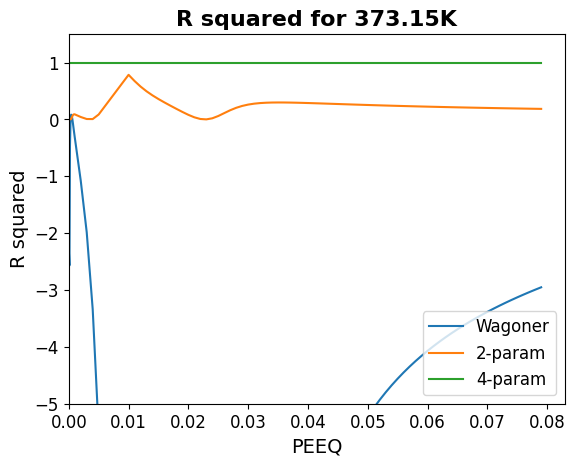

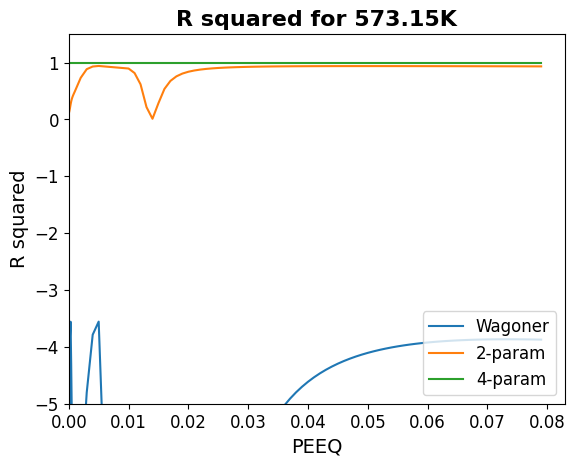

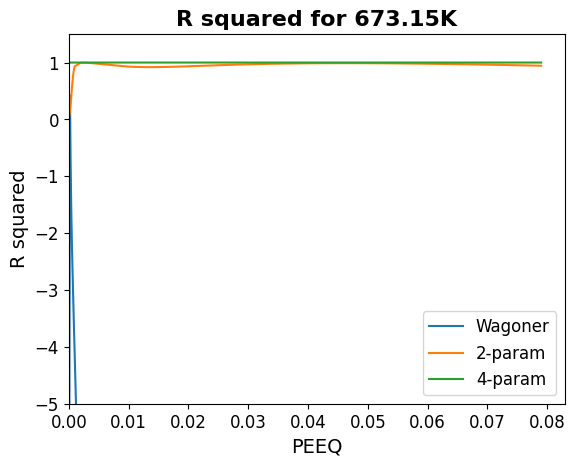

In [3]:
temps = ['373.15', '573.15', '673.15']
for temp in temps:
    #Different method results
    w = pd.read_csv(f'wagoner/w_m_values_{temp}.csv') 
    s1 = pd.read_csv(f'student/Parameters_Tmp{temp}_RD.csv')
    s2 = pd.read_csv(f'student2/Parameters_Tmp{temp}_RD_new.csv')

    strain = w['PEEQ']
    plt.plot(strain, w['R_squared'], label='Wagoner')
    plt.plot(strain, s1['R_squared'], label='2-param')
    plt.plot(strain, s2['R_squared'], label='4-param')
    plt.xlabel('PEEQ', fontsize=14)
    plt.ylabel('R squared', fontsize=14)
    plt.title(f'R squared for {temp}K', fontsize=16, fontweight='bold')
    plt.xlim(left=min(strain))
    plt.ylim(-5,1.5)
    plt.legend(loc='lower right', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()